# Project 
by Bernardo Augusto and Catarina Canastra

In [1]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
# Control delimiters, rows, column names with read_csv
df = pd.read_csv('D:\Downloads\Live (1).csv')

In [3]:
# shape of 7050 x 16 
df.shape

(7050, 16)

In [4]:
# show the dataset
pd.set_option('display.max_rows', 100)
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


## Data Cleaning

In [5]:
# discover how many data is missing
missing = df.isnull().sum()

print(missing)

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64


In [6]:
# Get all the features columns except the last 4 collumns
features = list(df.columns)[:-4]

# Get the features data
data = df[features]

In [7]:
# discover how many data is missing
missing = data.isnull().sum()
print(missing)

status_id           0
status_type         0
status_published    0
num_reactions       0
num_comments        0
num_shares          0
num_likes           0
num_loves           0
num_wows            0
num_hahas           0
num_sads            0
num_angrys          0
dtype: int64


In [8]:
# shape 7050 x 12
data.shape

(7050, 12)

In [9]:
# show the dataset
data.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [10]:
# we have to drop the status_id 
data = data.drop(['status_id','status_published'], axis=1)

In [11]:
# show the dataset
data.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


In [12]:
# now we have shape: 7050 x 10 

In [13]:
# There is no missing data so the next step is normalization
# but in this case the data doesnt need to be normalized 

## Exploratory Analysis

In [14]:
# show the number of 'photos', 'videos', 'status' and 'links' in the dataset
data['status_type'].value_counts()

photo     4288
video     2334
status     365
link        63
Name: status_type, dtype: int64

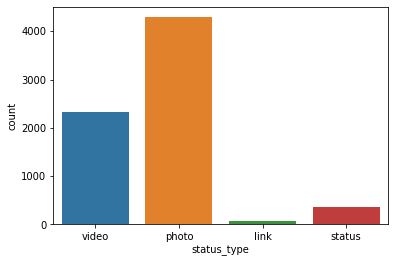

In [15]:
# graph of the number of photos', 'videos', 'status' and 'links' in the dataset
sns.countplot(x='status_type',data=data)

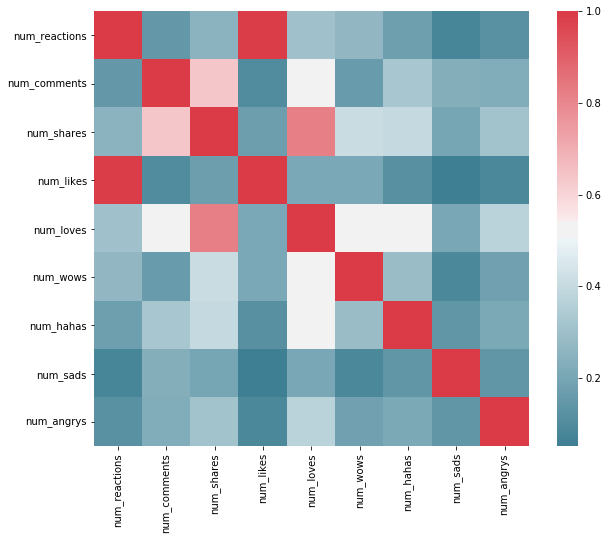

In [17]:
import seaborn as sns
from matplotlib import pyplot as pl
import numpy as np

# heatmap to show the relational between features
f, ax = pl.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [18]:
# count, mean, max and min values for the features
data.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


In [19]:
# transform the name of the posts in numbers so we can analyse them via cluster
s_type = {'video': 1,'photo': 2, 'status': 3,'link': 4} 

In [20]:
# with this we are changing the names (video, photo, ...) in the dataset into a numeric values (1, 2, ...)
data.status_type = [s_type[item] for item in data.status_type]

In [21]:
data.head(10)

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,529,512,262,432,92,3,1,1,0
1,2,150,0,0,150,0,0,0,0,0
2,1,227,236,57,204,21,1,1,0,0
3,2,111,0,0,111,0,0,0,0,0
4,2,213,0,0,204,9,0,0,0,0
5,2,217,6,0,211,5,1,0,0,0
6,1,503,614,72,418,70,10,2,0,3
7,1,295,453,53,260,32,1,1,0,1
8,2,203,1,0,198,5,0,0,0,0
9,2,170,9,1,167,3,0,0,0,0


## Best Algorithms

In [22]:
from sklearn import metrics

# choosing the best number of clusters using the silhouette score
range_n_clusters = list(range(2,10))

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(data)
    centers = clusterer.cluster_centers_

    score = metrics.silhouette_score(data, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.8721906623580915)
For n_clusters = 3, silhouette score is 0.8121405455901346)
For n_clusters = 4, silhouette score is 0.8175614312559213)
For n_clusters = 5, silhouette score is 0.7851594139379006)
For n_clusters = 6, silhouette score is 0.7599593454354427)
For n_clusters = 7, silhouette score is 0.7614026635673307)
For n_clusters = 8, silhouette score is 0.7166124861297116)
For n_clusters = 9, silhouette score is 0.7153413142995639)


In [23]:
# k-means clustering
from sklearn.cluster import KMeans
clustering_kmeans = KMeans(n_clusters=2)
data['Clusters'] = clustering_kmeans.fit_predict(data)

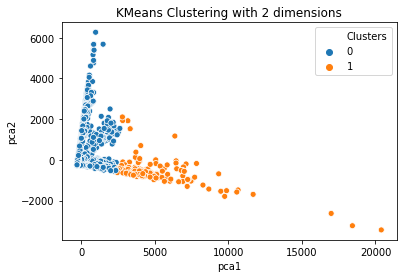

In [24]:
reduced_data = PCA(n_components=2).fit_transform(data)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=data['Clusters'], data=results)
plt.title('KMeans Clustering with 2 dimensions')
plt.show()

In [25]:
# agglomerative clustering
from sklearn.cluster import AgglomerativeClustering
clustering_kmeans = AgglomerativeClustering(n_clusters=2)
data['Clusters'] = clustering_kmeans.fit_predict(data)

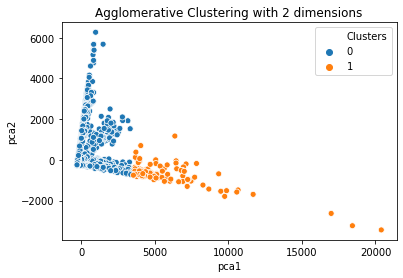

In [26]:
reduced_data = PCA(n_components=2).fit_transform(data)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=data['Clusters'], data=results)
plt.title('Agglomerative Clustering with 2 dimensions')
plt.show()

In [27]:
# mini-batch k-means clustering
from sklearn.cluster import MiniBatchKMeans
clustering_kmeans = MiniBatchKMeans(n_clusters=2)
data['Clusters'] = clustering_kmeans.fit_predict(data)

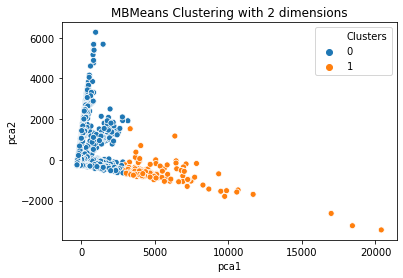

In [28]:
reduced_data = PCA(n_components=2).fit_transform(data)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=data['Clusters'], data=results)
plt.title('MBMeans Clustering with 2 dimensions')
plt.show()

## Other Algorithms

These algorithms dont perform as well as the shown previously

In [39]:
# Affinity Propagation
from sklearn.cluster import AffinityPropagation
clustering_kmeans = AffinityPropagation(damping=0.9)
data['Clusters'] = clustering_kmeans.fit_predict(data)

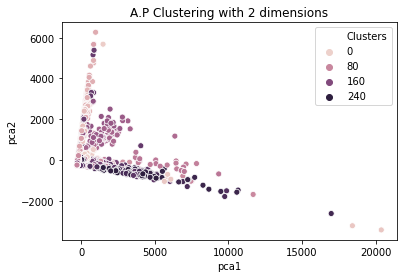

In [40]:
reduced_data = PCA(n_components=2).fit_transform(data)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=data['Clusters'], data=results)
plt.title('A.P Clustering with 2 dimensions')
plt.show()

In [31]:
# BIRCH clustering
from sklearn.cluster import Birch
clustering_kmeans = Birch()
data['Clusters'] = clustering_kmeans.fit_predict(data)

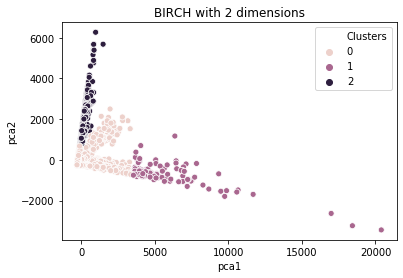

In [32]:
reduced_data = PCA(n_components=2).fit_transform(data)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=data['Clusters'], data=results)
plt.title('BIRCH with 2 dimensions')
plt.show()

In [33]:
# DBSCAN clustering
from sklearn.cluster import DBSCAN
clustering_kmeans = DBSCAN()
data['Clusters'] = clustering_kmeans.fit_predict(data)

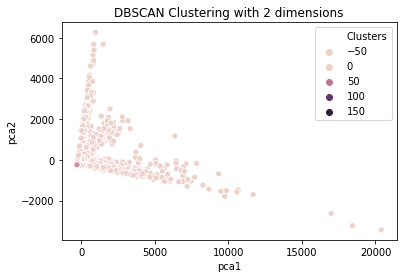

In [34]:
reduced_data = PCA(n_components=2).fit_transform(data)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=data['Clusters'], data=results)
plt.title('DBSCAN Clustering with 2 dimensions')
plt.show()

In [35]:
# mean shift clustering
from sklearn.cluster import MeanShift
clustering_kmeans = MeanShift()
data['Clusters'] = clustering_kmeans.fit_predict(data)

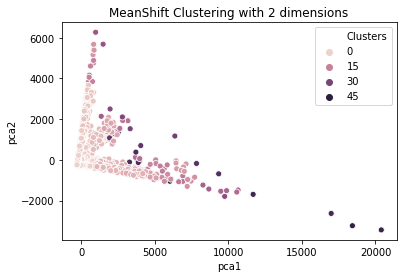

In [36]:
reduced_data = PCA(n_components=2).fit_transform(data)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=data['Clusters'], data=results)
plt.title('MeanShift Clustering with 2 dimensions')
plt.show()

In [37]:
# OPTICS clustering
from sklearn.cluster import OPTICS
clustering_kmeans = OPTICS()
data['Clusters'] = clustering_kmeans.fit_predict(data)

D:\Anaconda\lib\site-packages\sklearn\cluster\_optics.py:802: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


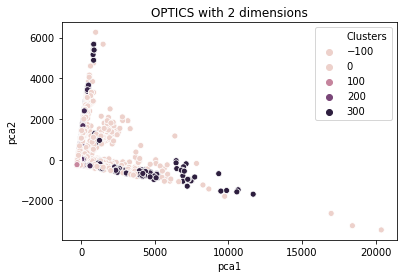

In [38]:
reduced_data = PCA(n_components=2).fit_transform(data)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=data['Clusters'], data=results)
plt.title('OPTICS with 2 dimensions')
plt.show()